In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [35]:
# Make a dataset from a folder of images
dataset = datasets.ImageFolder("/home/SharedData/Vinit/ZERO_SHOT_DATASET_SHREC13/train/img",
                                 transform=transforms.ToTensor())

In [36]:
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

tensor([11, 61, 53, 77, 43,  4, 31, 70, 51, 44, 60, 62, 44, 52, 63,  5, 44, 47,
        45, 63, 22,  9, 10, 51, 56, 13, 68, 43, 44, 48, 25, 63, 46, 50, 30, 34,
        68, 37,  3, 33, 56, 41, 51, 48, 70, 58, 33,  1, 45,  1, 62, 55, 40,  1,
        38,  1, 75, 38, 27, 64, 77, 41,  2, 12])


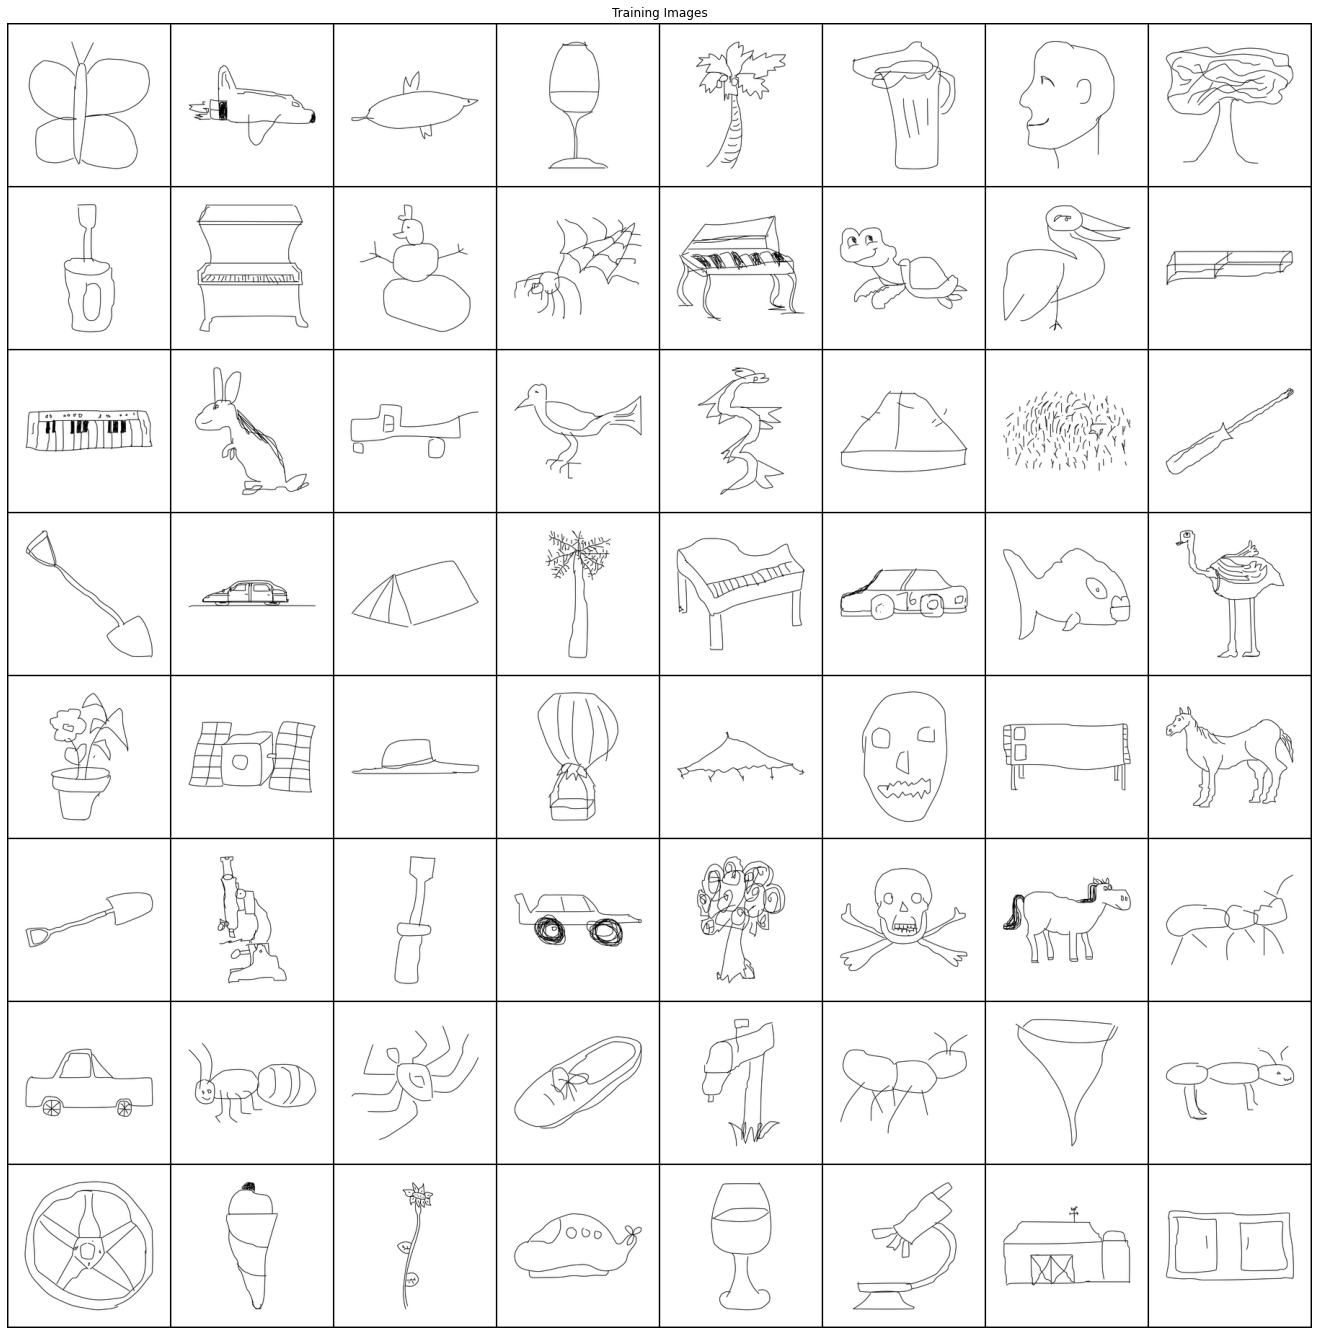

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

for images, labels in data_loader:
    plt.figure(figsize=(24, 24))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(images, nrow=8).cpu(), (1, 2, 0)))
    print(labels)
    break

In [38]:
def get_mean_std(loader):
    """Compute the mean and std value of dataset."""
    channel_sum, channel_squared_sum, num_batches = 0, 0, 0
    for data, _ in loader:
        channel_sum += torch.mean(data, dim=[0, 2, 3])
        channel_squared_sum += torch.mean(data ** 2, dim=[0, 2, 3])
        num_batches += 1
    mean = channel_sum / num_batches
    std = (channel_squared_sum / num_batches - mean ** 2) ** 0.5
    return mean, std

In [39]:
get_mean_std(data_loader)

(tensor([0.9799, 0.9799, 0.9799]), tensor([0.1075, 0.1075, 0.1075]))

In [19]:
# Make a new dataloader with the same dataset, but with different transforms
new_dataset = datasets.ImageFolder("/home/SharedData/Vinit/ZERO_SHOT_DATASET_SHREC13/train/img",
                                    transform=transforms.Compose([
                                        transforms.Resize((224, 224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.0153, 0.0153, 0.0153],
                                                                std=[0.0017, 0.0017, 0.0017])
                                    ]))

In [20]:
new_data_loader = DataLoader(new_dataset, batch_size=64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([19, 11, 66, 28, 14, 46,  5,  3, 34, 41, 60, 23, 46, 70, 23, 32, 65, 57,
        72, 30, 26, 75, 15, 51, 42, 17, 74, 58, 13,  8, 63, 10, 49, 28, 26, 39,
        51, 77, 45, 29, 56, 51, 27, 46, 28, 73, 43, 52, 11, 26, 53, 11, 43, 67,
        45,  1, 76, 77, 32, 43, 69, 60, 32, 70])


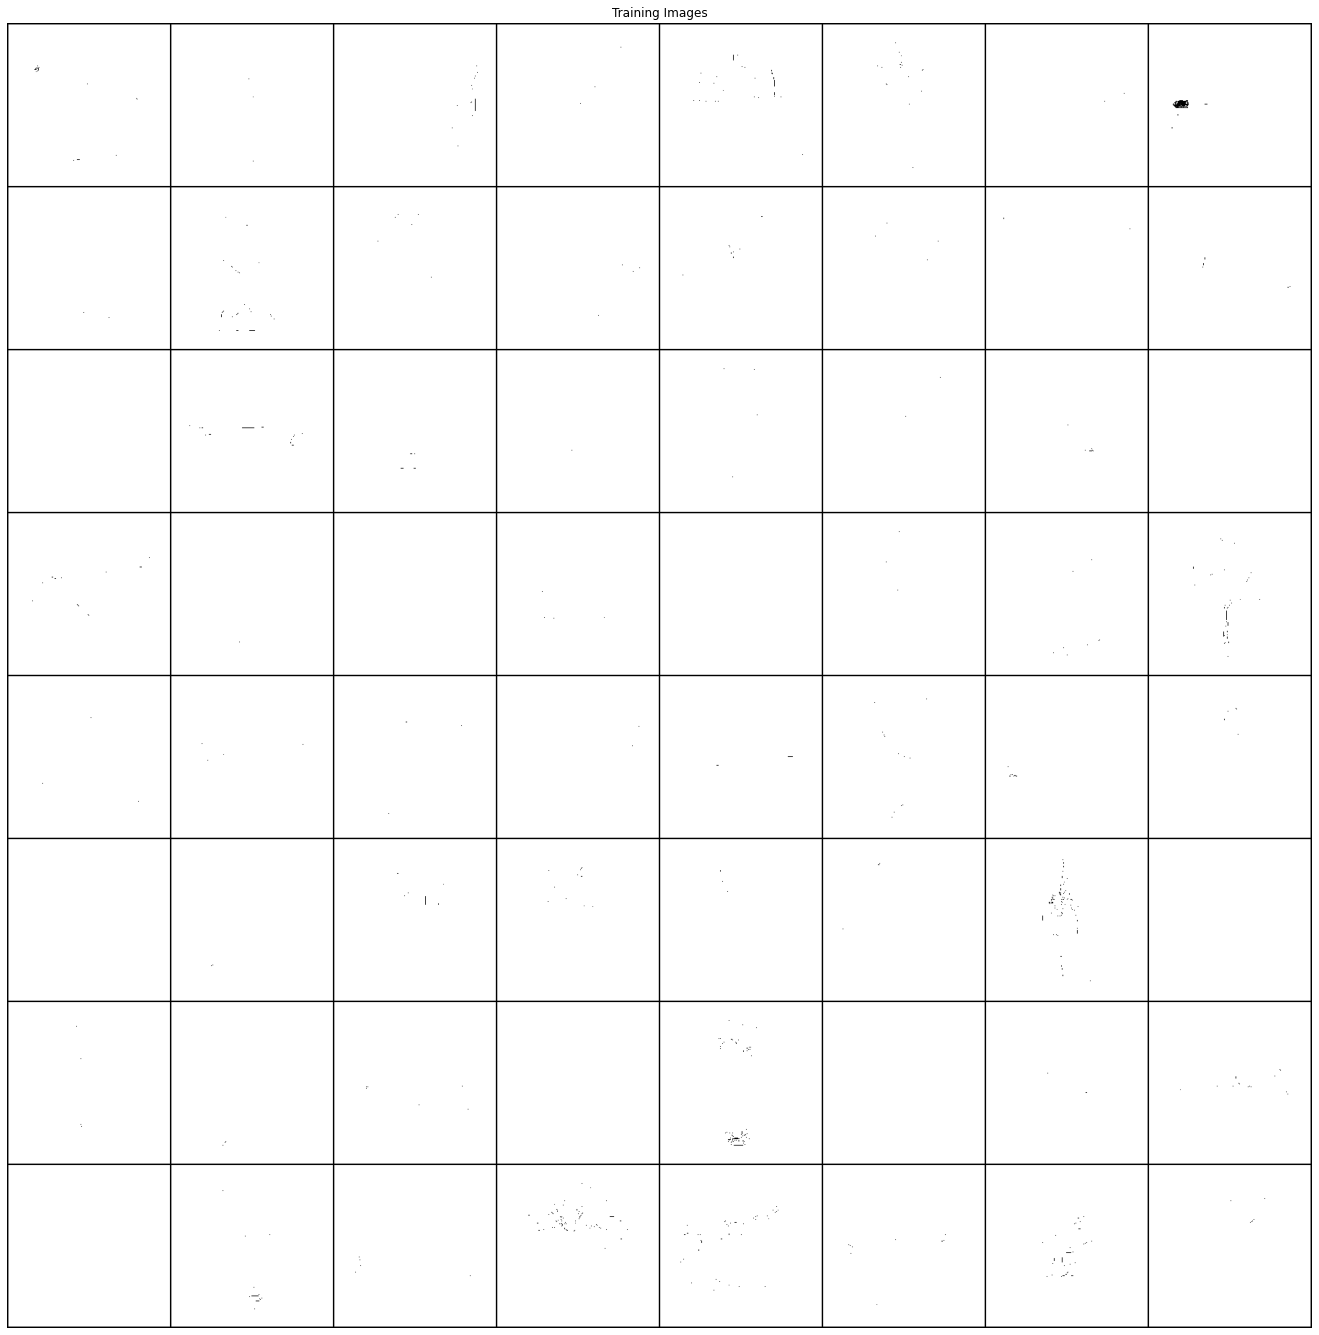

In [21]:
# Plot some images
for images, labels in new_data_loader:
    plt.figure(figsize=(24, 24))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(images, nrow=8).cpu(), (1, 2, 0)))
    print(labels)
    break

In [22]:
# Check number of classes in the dataset
len(new_dataset.classes)

79